/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


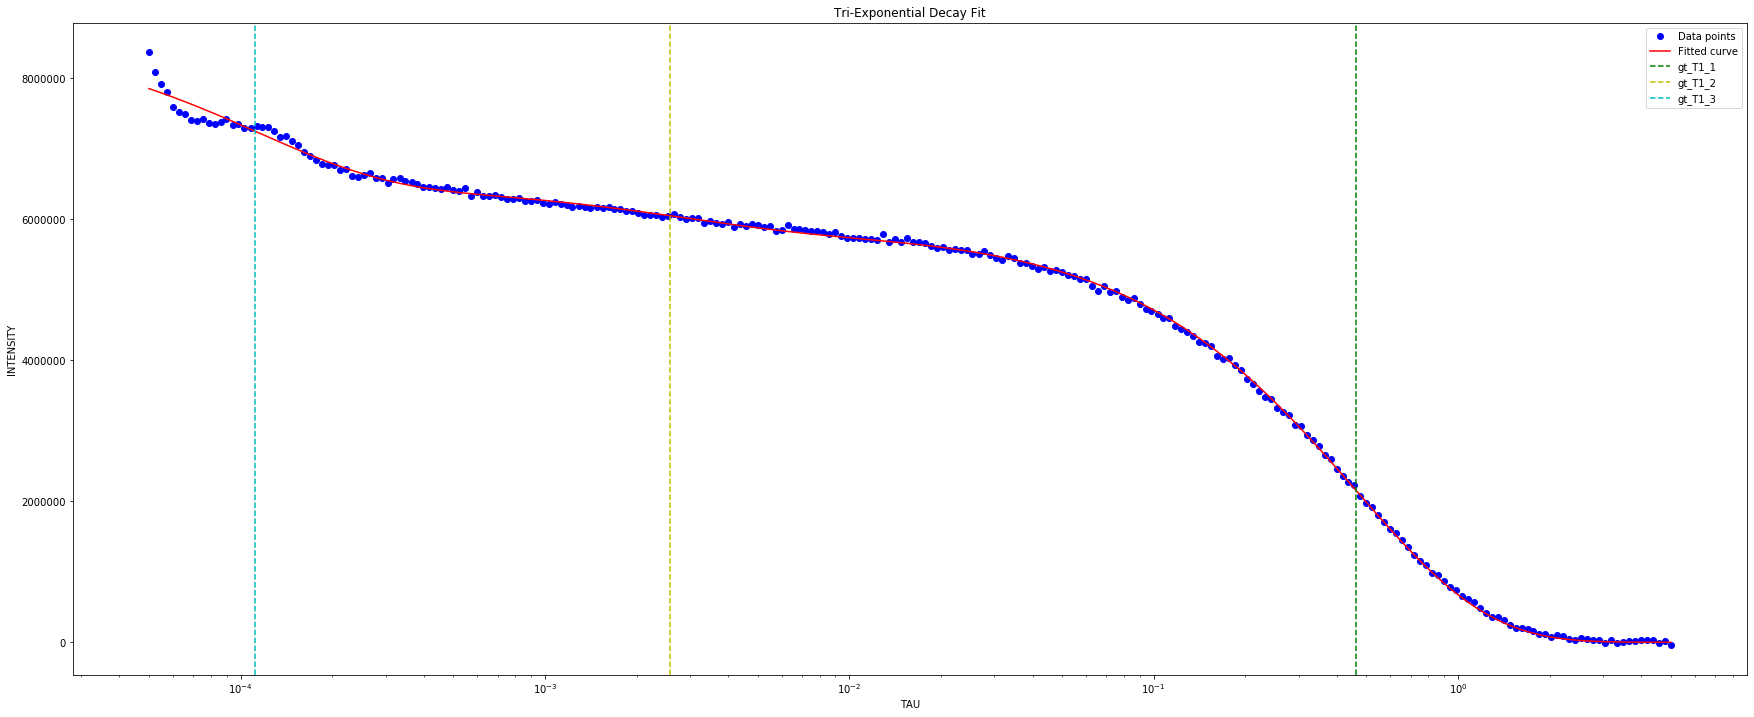

In [25]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


# Define the tri-exponential decay function
def tri_exp(t, S1, T1, S2, T1_2, S3, T1_3):
    return S1 * np.exp(-t / T1) + S2 * np.exp(-t / T1_2) + S3 * np.exp(-t / T1_3)

def take_eight_equidistance_points(data):
    interval = len(data) // 8
    selected_indices = []
    
    for i in range(0, len(data), interval):
        if len(selected_indices) < 8:
            selected_indices.append(i)
        else:
            break

    # Selecting the points
    selected_points = data.iloc[selected_indices]
    
    # Removing the selected points from the original data
    updated_data = data.drop(data.index[selected_indices])

    return selected_points, updated_data


def take_random_point(data_set_bag, current_data_set):
    # Select a random index from data_set_bag
    random_index = np.random.choice(data_set_bag.index)
    
    # Select the point and remove it from data_set_bag
    random_point = data_set_bag.loc[[random_index]]
    data_set_bag = data_set_bag.drop(random_index)
    
    # Add the random point to current_data_set
    current_data_set = pd.concat([current_data_set, random_point])
    
    # Sort current_data_set by the "TAU" column
    current_data_set = current_data_set.sort_values('TAU').reset_index(drop=True)
    
    return current_data_set, data_set_bag



RAW_DATA = pd.read_csv("decay_data/tri_decay.csv")

RAW_TAU = RAW_DATA["TAU"]
RAW_INT = RAW_DATA["INTENSITY"]

init_cond = [ 
    RAW_INT[0],
    0.5,
    RAW_INT[0],
    0.005,
    RAW_INT[0],
    0.0005
]

# Perform the curve fitting
# Replace 'time' and 'decay' with the actual column names from your CSV file
popt, pcov = curve_fit(tri_exp, RAW_TAU, RAW_INT, p0=init_cond)


gt_S1, gt_T1_1, gt_S2, gt_T1_2, gt_S3, gt_T1_3 = popt

fitted_curve = tri_exp(RAW_TAU, *popt)


# Create the plot
plt.figure(figsize=(30, 12))

plt.plot(RAW_TAU, RAW_INT, 'bo', label='Data points')  # Plot the raw data points
plt.plot(RAW_TAU, fitted_curve, 'r-', label='Fitted curve')  # Plot the fitted curve

# Add vertical lines for gt_T1_1, gt_T1_2, and gt_T1_3
plt.axvline(x=gt_T1_1, color='g', linestyle='--', label='gt_T1_1')
plt.axvline(x=gt_T1_2, color='y', linestyle='--', label='gt_T1_2')
plt.axvline(x=gt_T1_3, color='c', linestyle='--', label='gt_T1_3')

plt.xscale("log")
plt.xlabel('TAU')
plt.ylabel('INTENSITY')
plt.title('Tri-Exponential Decay Fit')
plt.legend()
plt.show()
    

In [37]:
current_data_set, data_set_bag = take_eight_equidistance_points(RAW_DATA)



original = data_set_bag.copy()

result = []

for _ in range(2):
    
    data_set_bag = original.copy()
    
    T1_1_DIFF = []
    T1_2_DIFF = []
    T1_3_DIFF = []

    popt, pcov = curve_fit(tri_exp, current_data_set["TAU"], current_data_set["INTENSITY"], p0=init_cond)

    S1, T1_1, S2, T1_2, S3, T1_3 = popt

    T1_1_DIFF.append((T1_1 - gt_T1_1)**2)
    T1_2_DIFF.append((T1_2 - gt_T1_2)**2)
    T1_3_DIFF.append((T1_3 - gt_T1_3)**2)

    while len(data_set_bag):
        current_data_set, data_set_bag = take_random_point(data_set_bag, current_data_set)
        popt, pcov = curve_fit(tri_exp, current_data_set["TAU"], current_data_set["INTENSITY"], p0=init_cond)

        S1, T1_1, S2, T1_2, S3, T1_3 = popt

        T1_1_DIFF.append((T1_1 - gt_T1_1)**2)
        T1_2_DIFF.append((T1_2 - gt_T1_2)**2)
        T1_3_DIFF.append((T1_3 - gt_T1_3)**2)
    

/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.p

/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.p

/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.p

/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.p

/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.p

/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.p

/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.p

/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.p

/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.p

/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.p

/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/pandas/core/arraylike.p

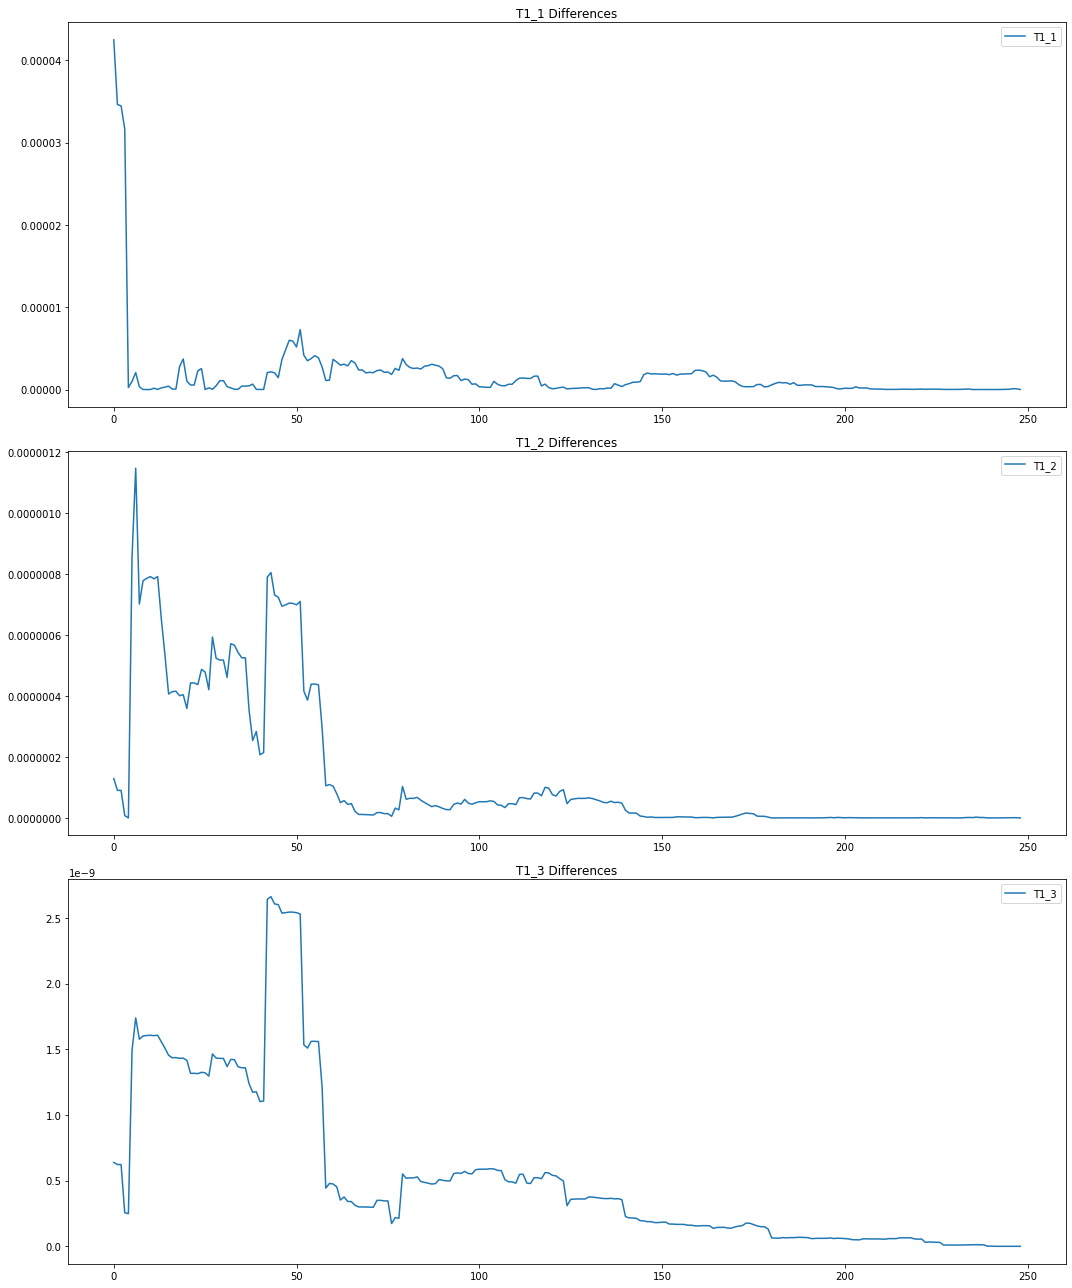

In [36]:
plt.figure(figsize=(15,18))  # Adjust the figure size to accommodate three subplots

# Plot T1_1_DIFF on the first subplot
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot([i for i in range(len(T1_1_DIFF))], T1_1_DIFF, label="T1_1")
plt.legend()
plt.title("T1_1 Differences")

# Plot T1_2_DIFF on the second subplot
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.plot([i for i in range(len(T1_2_DIFF))], T1_2_DIFF, label="T1_2")
plt.legend()
plt.title("T1_2 Differences")

# Plot T1_3_DIFF on the third subplot
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot([i for i in range(len(T1_3_DIFF))], T1_3_DIFF, label="T1_3")
plt.legend()
plt.title("T1_3 Differences")

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()